# Matplotlib and Seaborn

In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Data/tips.csv')
print(df.shape)
df.head()

(244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [4]:
df.isna().sum().sort_values(ascending = False)

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

## Univariate non visual statistical analysis

In [25]:
#splitting the data into two distinct groups

cat_df = df.select_dtypes(include=['object'])
num_df = df.select_dtypes(include=['number'])

In [21]:
#creating functions

def discrete_uni_analysis(data):
    for col_name in data:
        print('\n','*'*5, col_name, '*'*5)
        print(data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value_counts: \n', data[col_name].value_counts())
        
        
def num_uni_analysis(data):
    for col_name in data:
        print('\n','*'*5, col_name, '*'*5)
        print(data[col_name].agg(['count', 'min', 'max', 'mean','skew', 'median', 'std']))
        

In [26]:
#using the functions
discrete_uni_analysis(cat_df)


 ***** sex *****
count                 244
nunique                 2
unique     [Female, Male]
Name: sex, dtype: object
Value_counts: 
 Male      157
Female     87
Name: sex, dtype: int64

 ***** smoker *****
count            244
nunique            2
unique     [No, Yes]
Name: smoker, dtype: object
Value_counts: 
 No     151
Yes     93
Name: smoker, dtype: int64

 ***** day *****
count                        244
nunique                        4
unique     [Sun, Sat, Thur, Fri]
Name: day, dtype: object
Value_counts: 
 Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

 ***** time *****
count                  244
nunique                  2
unique     [Dinner, Lunch]
Name: time, dtype: object
Value_counts: 
 Dinner    176
Lunch      68
Name: time, dtype: int64


In [23]:
num_uni_analysis(num_df)


 ***** total_bill *****
count     244.000000
min         3.070000
max        50.810000
mean       19.785943
skew        1.133213
median     17.795000
std         8.902412
Name: total_bill, dtype: float64

 ***** tip *****
count     244.000000
min         1.000000
max        10.000000
mean        2.998279
skew        1.465451
median      2.900000
std         1.383638
Name: tip, dtype: float64

 ***** size *****
count     244.000000
min         1.000000
max         6.000000
mean        2.569672
skew        1.447882
median      2.000000
std         0.951100
Name: size, dtype: float64


## Bivariate non visual statistical analysis

In [24]:
#num vs num

num_df.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [30]:
#cat vs cat 

pd.crosstab(cat_df['sex'], cat_df['smoker'], normalize = 'index')

smoker,No,Yes
sex,,
Female,0.620690,0.379310
Male,0.617834,0.382166


In [32]:
#num vs cat

grouping = df.groupby('sex')
grouping['total_bill'].agg(['min', 'max', 'mean'])

,min,max,mean
sex,,,
Female,3.07,44.30,18.056897
Male,7.25,50.81,20.744076


## Univariate plotting for num columns - histogram, KDE, ECDF and box plot

Where ECDF = Empirical Cumulative Distribution Function plot

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

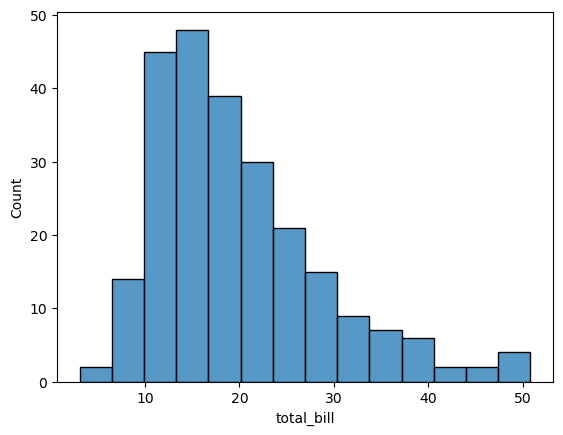

In [38]:
#to see the distribution of the total bill in the data
sns.histplot(data=df, x='total_bill')

<AxesSubplot:xlabel='total_bill'>

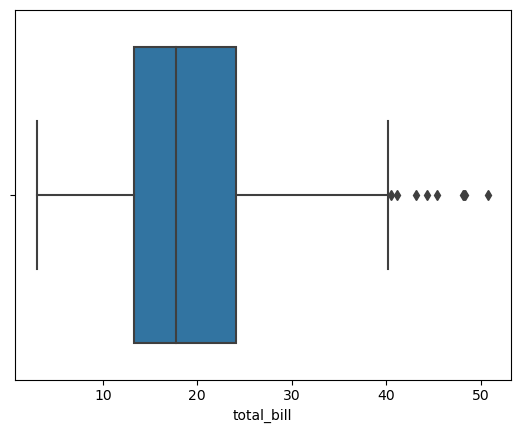

In [36]:
#using the boxplot
sns.boxplot(data=df, x='total_bill')

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

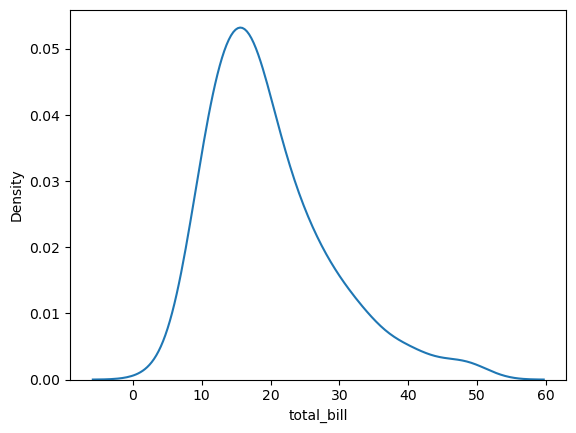

In [39]:
sns.kdeplot(data=df, x='total_bill')

<AxesSubplot:xlabel='total_bill', ylabel='Proportion'>

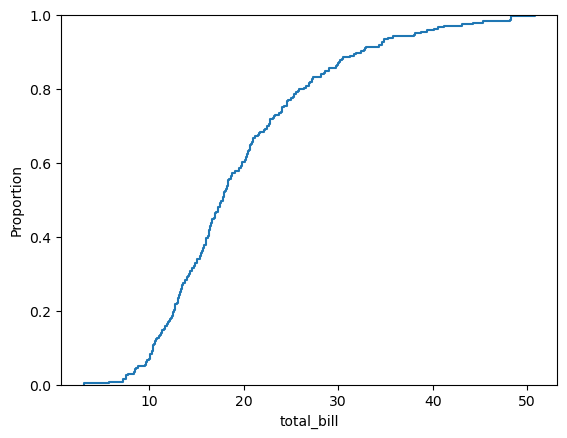

In [40]:
#using an ecdf, it visualizes all the data points but is less intuitive
sns.ecdfplot(data=df, x='total_bill')

<AxesSubplot:title={'center':'Boxen plot'}, xlabel='total_bill'>

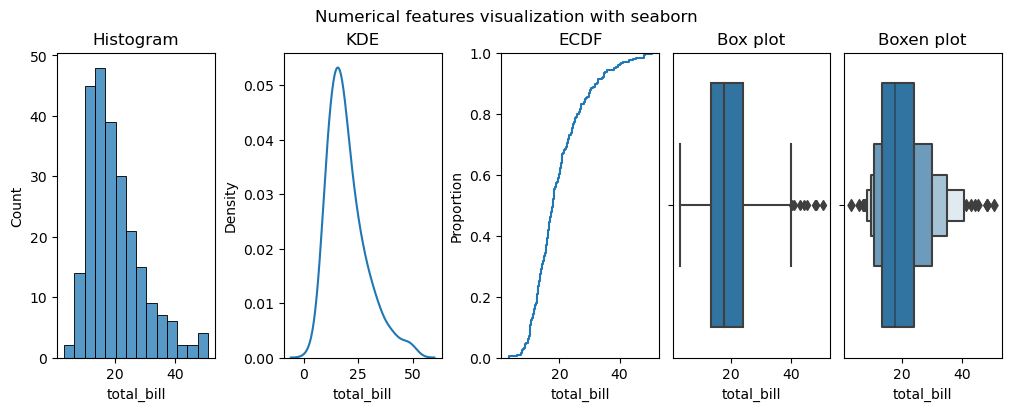

In [41]:
#presenting all the plots using subplots

fig, axs = plt.subplots(1,5, figsize=(10, 4), layout='constrained')
plt.suptitle('Numerical features visualization with seaborn')

axs[0].set_title('Histogram')
sns.histplot(data=df, x='total_bill', ax=axs[0])

axs[1].set_title('KDE')
sns.kdeplot(data=df, x='total_bill', ax=axs[1])

axs[2].set_title('ECDF')
sns.ecdfplot(data=df, x='total_bill', ax=axs[2])

axs[3].set_title('Box plot')
sns.boxplot(data=df, x='total_bill', ax=axs[3])

axs[4].set_title('Boxen plot')
sns.boxenplot(data=df, x='total_bill', ax=axs[4])

## Univariate plotting for categorical columns

<AxesSubplot:xlabel='day', ylabel='count'>

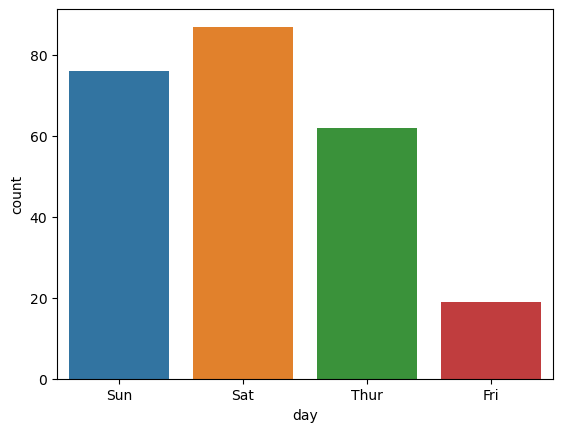

In [42]:
#countplot

sns.countplot(data=df, x='day')

## Bivariate plotting for "num vs num" columns
`Line plot, scatter plot, hexbin, heat map, pair plot`

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

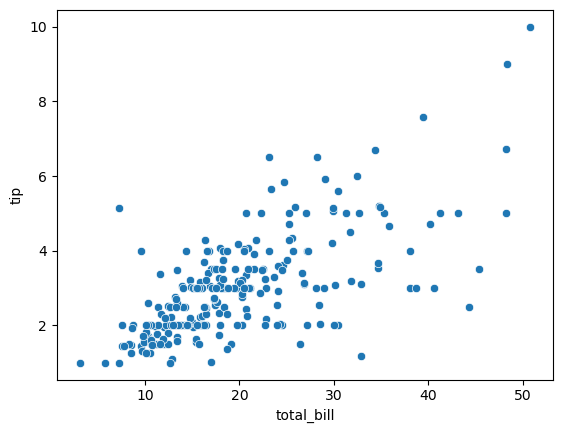

In [43]:
sns.scatterplot(data=df, x='total_bill', y='tip')

<AxesSubplot:title={'center':'Line plot'}, xlabel='total_bill', ylabel='tip'>

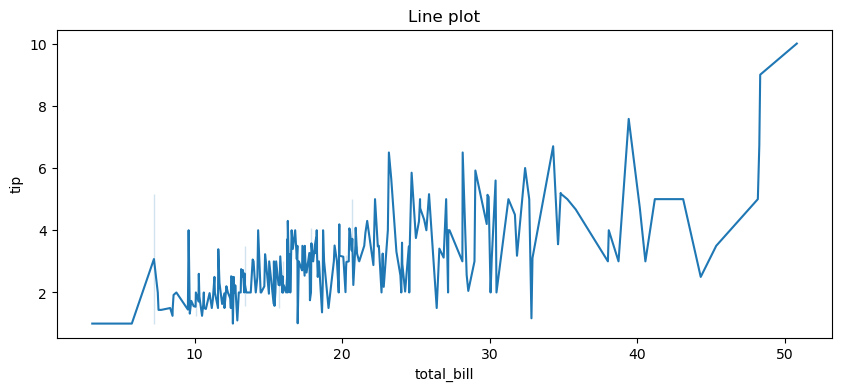

In [45]:
#using a line plot

fig, ax = plt.subplots(figsize=(10,4))
ax.set_title('Line plot')
sns.lineplot(data=df, x='total_bill', y='tip')


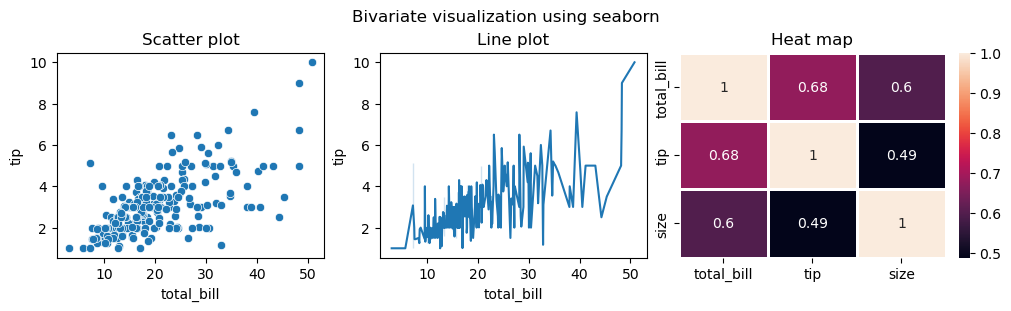

In [47]:
fig, axs =plt.subplots(1,3, figsize=(10,3), layout='constrained')
fig.suptitle('Bivariate visualization using seaborn')

axs[0].set_title('Scatter plot')
sns.scatterplot(data=df, x='total_bill', y='tip', ax=axs[0])

axs[1].set_title('Line plot')
sns.lineplot(data=df, x='total_bill', y='tip', ax=axs[1])

axs[2].set_title('Heat map')
sns.heatmap(data=df.select_dtypes(include=['number']).corr(), annot=True, linewidths=0.8, ax=axs[2])

plt.show()

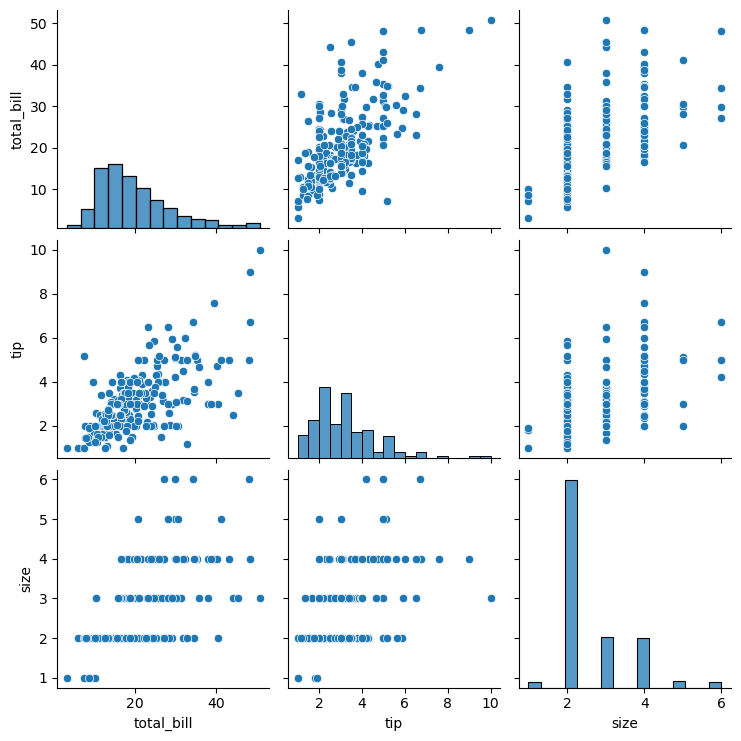

In [48]:
#creating a pairplot
sns.pairplot(df)

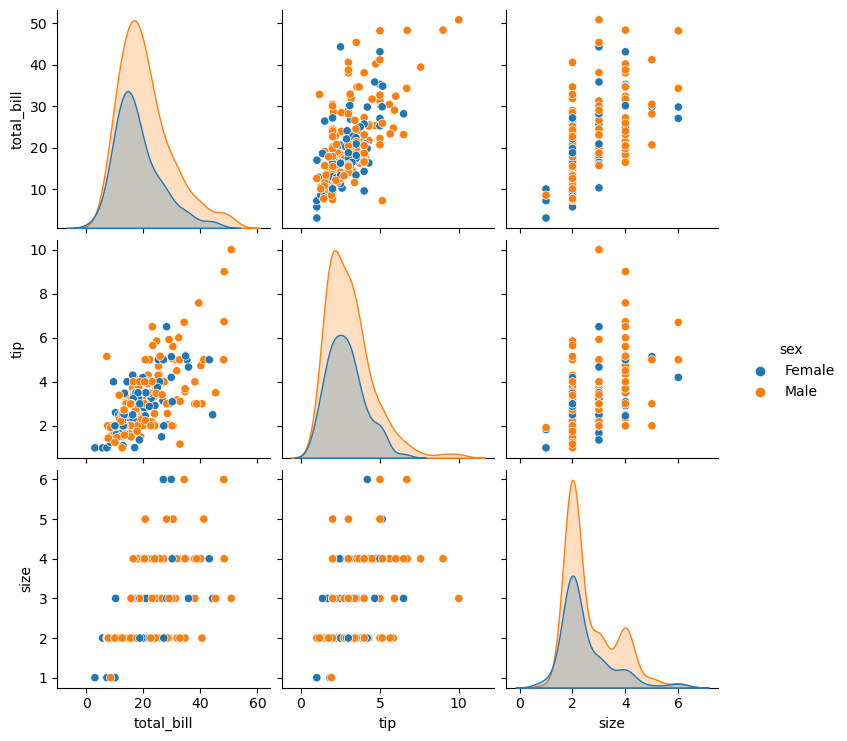

In [49]:
#pairplot with an emphasis on the distribution between gender

sns.pairplot(df, hue='sex')

## Bivariate plotting for "num vs cat" columns
`Box plot, violin plot, boxen plot, histogram`

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

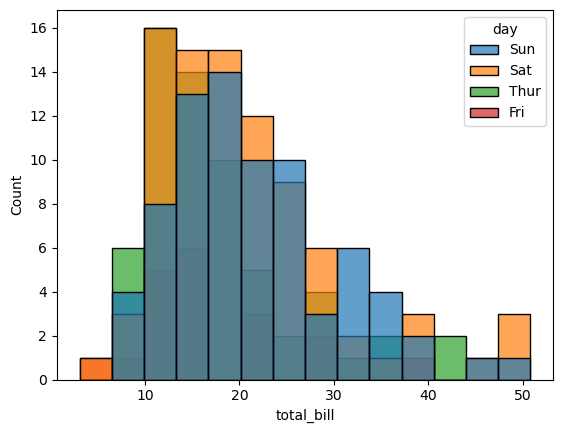

In [68]:
sns.histplot(data=df, x='total_bill', hue='day', alpha=0.7)

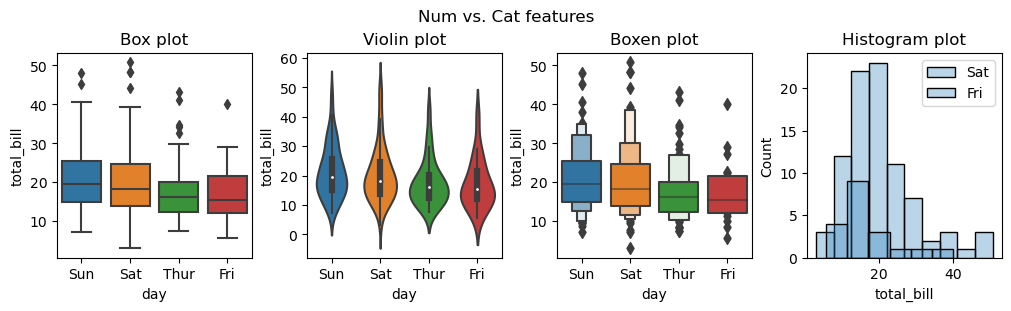

In [55]:
#using subplots

fig, axs = plt.subplots(1,4, figsize=(10,3), constrained_layout=True)
plt.suptitle('Num vs. Cat features')

axs[0].set_title('Box plot')
sns.boxplot(data=df, x='day', y='total_bill', ax=axs[0])

axs[1].set_title('Violin plot')
sns.violinplot(data=df, x='day', y='total_bill', ax=axs[1])

axs[2].set_title('Boxen plot')
sns.boxenplot(data=df, x='day', y='total_bill', ax=axs[2])

axs[3].set_title('Histogram plot')
sns.histplot(data=df.loc[df['day']=='Sat'], x='total_bill', alpha=0.3, ax=axs[3], label='Sat')
sns.histplot(data=df.loc[df['day']=='Fri'], x='total_bill', alpha=0.3, ax=axs[3], label='Fri')
axs[3].legend()

## Multiplot grid using FacetGrid

### Question:
Which gender pays more?

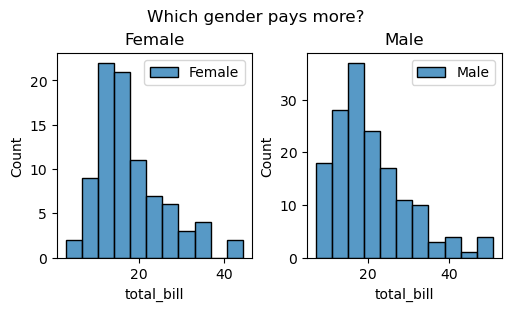

In [57]:
#without facetgrid

fig, axs = plt.subplots(1,2, figsize=(5,3), constrained_layout=True)
plt.suptitle('Which gender pays more?')

axs[0].set_title('Female')
sns.histplot(data=df.loc[df['sex']=='Female'], x='total_bill', ax=axs[0], label='Female')
axs[0].legend()

axs[1].set_title('Male')
sns.histplot(data=df.loc[df['sex']=='Male'], x='total_bill', ax=axs[1], label='Male')
axs[1].legend()

Notice how both plots have different scales for the y axis. This makes it difficult to comapre both plots.

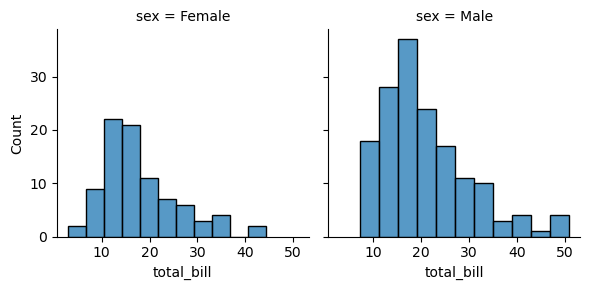

In [58]:
#using facetgrid

grid = sns.FacetGrid(df, col='sex')
grid.map(sns.histplot, 'total_bill')

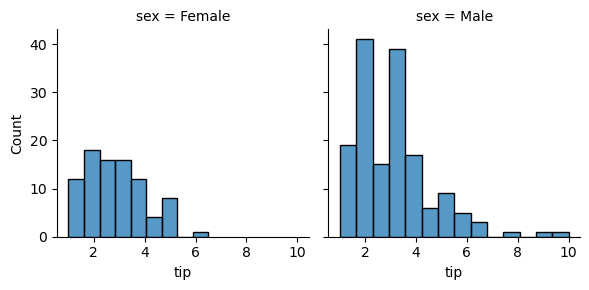

In [59]:
grid = sns.FacetGrid(df, col='sex')
grid.map(sns.histplot, 'tip')

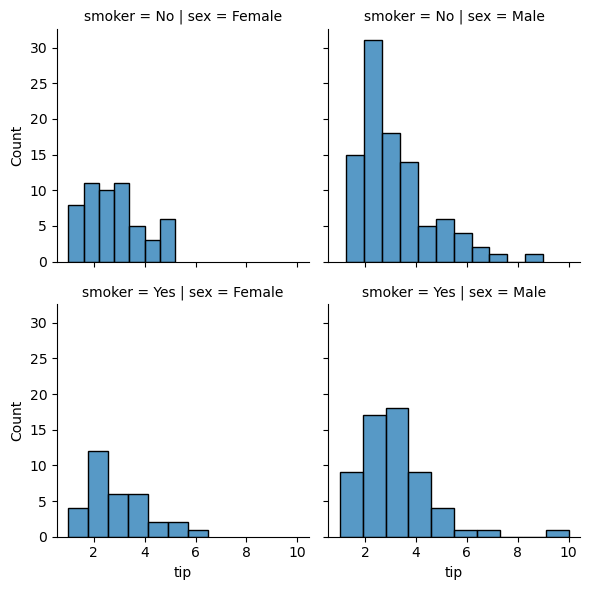

In [60]:
grid = sns.FacetGrid(df, col='sex', row='smoker')
grid.map(sns.histplot, 'tip')

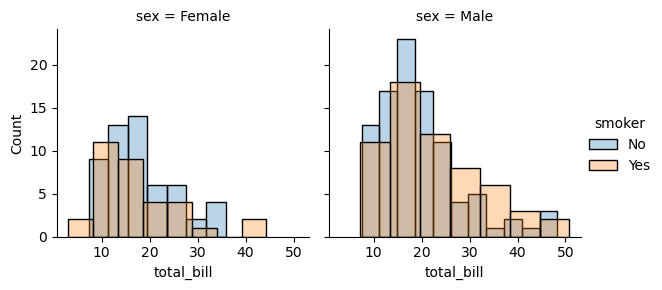

In [61]:
grid = sns.FacetGrid(df, col='sex', hue='smoker')
grid.map(sns.histplot, 'total_bill', alpha=0.3)
grid.add_legend()

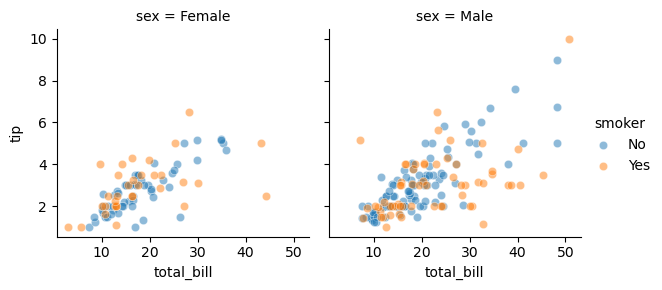

In [62]:
grid = sns.FacetGrid(df, col='sex', hue='smoker')
grid.map(sns.scatterplot, 'total_bill', 'tip', alpha=0.5)
grid.add_legend()

## Bivariate plotting for "cat vs cat" columns

`grouped count plot`

Text(0.5, 1.0, 'Grouped count plot')

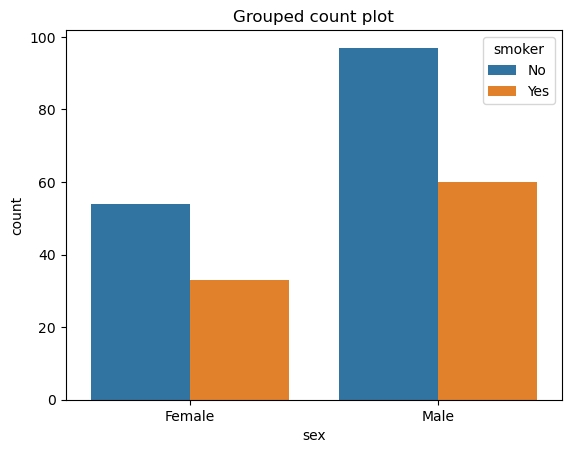

In [64]:
sns.countplot(data=df, x='sex', hue='smoker')
plt.title('Grouped count plot')